# PROJECT: ANALYSIS OF FACTORS THAT INFLUENCE EMPLOYEES QUIT THEIR EMPLOY

## INTRODUCTION AND AIM

For this project we will work this surveys from employees of the Department of Education, Training and Employment [DETE](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey), and the Technical and Further Education [TAFE](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) institue in Queensland, Australia.

Our stakeholders want to know the following:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

they want us to combine the results of both surveys to answer these questions. Both surveys have the same template but with some difference between them. we will explore this data set, will perform data cleaning, plot results and analyse the findings. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [2]:
dete_survey=pd.read_csv("dete_survey.csv")
tafe_survey=pd.read_csv("tafe_survey.csv")

## DATA EXPLORATION

Let´s to get a first sight of each data frame trough displaying first 5 rows and find null values out

In [3]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [5]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [6]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [7]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [8]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

After running above code we can say  that for these data frames there are a few observations to look at:

* each of this data sets has a lot of columns, for dete_survey 56 and dete_survey 72.
* there are many NaN values 
* these null values do not follow a trend, it can be at the last column, middle or the firsts columns
* Just the basic information as ID, reason the person ends employment, dates ad others have no null values
* there are missing values not represented as NaN

## DATA CLEANING

Next, let´s make some changes to these data frames.
* first we will read again the dete_survey dataset since there are some values that should be represented as Nan but they are Not Stated.
* then, some columns that we do not need will be deleted in order to reduce the data bases

In [9]:
dete_survey=pd.read_csv("dete_survey.csv",na_values="Not Stated")

In [10]:
dete_survey_updated=dete_survey.drop(dete_survey.columns[28:49],axis=1)

In [11]:
tafe_survey_updated=tafe_survey.drop(tafe_survey.columns[17:66],axis=1)

Because we want to combine both data frame it is important to standarize the column names.
Next, we will rename the columns of dete_survey_updated  and tafe_survey_updated datasets.

In [12]:
dete_survey_updated.columns=dete_survey_updated.columns.str.replace(" ","_").str.strip().str.lower()

In [13]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [14]:
new_cols={
    'Record ID': 'id','CESSATION YEAR': 'cease_date','Reason for ceasing employment': 'separationtype','Gender. What is your Gender?': 'gender','CurrentAge. Current Age': 'age','Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position','LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service','LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
  }

In [15]:
tafe_survey_updated=tafe_survey_updated.rename(columns=new_cols)

In [16]:
dete_survey_updated.head(2)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN


In [17]:
tafe_survey_updated.head(2)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN


After modifying column names the changes look good and both data sets are not so different like before

Our end goal is to answer the question:
* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

If we look unique values of separationtype columns for each data frame we will see there are diferente separation type, for this project we will analyze people who resigned which is set as "Resignation".

Note that dete_survey_updated contains several separation types with the string "Resignation", we will keep all of them. 

In [18]:
dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [19]:
tafe_survey_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [20]:
all_Resignation=r"Resignation"
dete_resignations=dete_survey_updated[dete_survey_updated["separationtype"].str.contains(all_Resignation)].copy()

In [21]:
dete_resignations["separationtype"].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [22]:
tafe_resignations=tafe_survey_updated[tafe_survey_updated["separationtype"]=="Resignation"].copy()

In [23]:
tafe_resignations["separationtype"].value_counts()

Resignation    340
Name: separationtype, dtype: int64

In the previous step we showed unique values for the "separationtype" columns for each data frame, then storaged separationtype columns with Resignation values as copy for each one in order to avoid SettingWithCopy Warning.

Now we are going to check cease_date and dete_start_date columns in order to check out inconsistencies in dates of each person started to work and the last year employment.

In [24]:
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
09/2010      1
07/2012      1
07/2006      1
Name: cease_date, dtype: int64

In [25]:
#just extract the year
patter=r"([2][0][0-1][0-9])"
dete_resignations["cease_date"].str.extract(patter).astype(float).squeeze().value_counts(ascending=False)

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: 0, dtype: int64

In [26]:
dete_resignations["dete_start_date"].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [27]:
tafe_resignations["cease_date"].value_counts().sort_index(ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

Checking above results we can say that There aren't any major issues with the years and it is not neccesary to drop values.

After verifying the years in dete_resignations dataframe, we will use this to create a new column in order to find ut the lenght of time an employee spent in a workplace, it means years of service. this column is already in tafe_resignations dataframe, it was renamed as institute_service in roder to analyze both data sets institue_service column will be created in dete_resignations.

In [28]:
start_year=dete_resignations["dete_start_date"].astype(float).squeeze()
end_year=dete_resignations["cease_date"].str.extract(patter).astype(float).squeeze()

In [29]:
dete_resignations["institute_service"]=end_year-start_year

In [30]:
dete_resignations["institute_service"]

3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
       ... 
808     3.0
815     2.0
816     2.0
819     5.0
821     NaN
Name: institute_service, Length: 311, dtype: float64

In [31]:
dete_resignations.reset_index(inplace=True)
dete_resignations.head()

,index,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
0,3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
1,5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
2,8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
3,9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
4,11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


once we substract dete_start_date from the cease_date a new column es created and place it on dete_resignations dataframe but as index is not organized due to "Resignation" cleaning we reseted the index for avoid confusing.

## ADDING  "dissatisfied" COLUMN

Now we will identify employees who resigned because they were dissatified.
first let's list columns for each data frame that can be considered as "dissatisfied" reasons:
1) tafe_survey_updated:
 * Contributing Factors. Dissatisfaction
 * Contributing Factors. Job Dissatisfaction
 
2) dete_survey_updated:
 * job_dissatisfaction
 * dissatisfaction_with_the_department 
 * physical_work_environment 
 * lack_of_recognition
 * lack_of_job_security
 * work_location 
 * employment_conditions 
 * work_life_balance
 * workload

for each columns previously listed  we will mark each one as True, False or Nan values in a new column, if any column contains a True vale, we will add a True value to the new column named "dissatisfied" for the rest of values we will follow the next proccess:

* Return False if none of the elements in the selected columns above is True 
* Return NaN if the value is NaN 

First of all let's check values for each column of tafe_resignations dataframe

In [32]:
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [33]:
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [34]:
def update_vals(value):
    if pd.isnull(value):
        return np.nan
    elif value == "-":
        return False
    else:
        return True
    
tafe_resignations["dissatisfied"]=tafe_resignations[["Contributing Factors. Dissatisfaction","Contributing Factors. Job Dissatisfaction"]].applymap(update_vals).any(axis=1, skipna=False).copy()
tafe_resignations_up=tafe_resignations.copy()

In [35]:
tafe_resignations_up["dissatisfied"].value_counts()

False    241
True      91
Name: dissatisfied, dtype: int64

In [36]:
columns=[
    "job_dissatisfaction","dissatisfaction_with_the_department",
    "physical_work_environment",
    "lack_of_recognition",
    "lack_of_job_security",
    "work_location",
    "employment_conditions",
    "work_life_balance",
    "workload"
]

dete_resignations["dissatisfied"] = dete_resignations[columns].any(axis=1, skipna=False).copy()
dete_resignations_up=dete_resignations.copy()
dete_resignations_up["dissatisfied"].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

After run the previous codes, the  tafe_resignations data shows more resignations due to not dissatify reason as well for the dete_resignations dataset:
* tafe survey shows that only 91/332 people left their employs due to they were dissatisfied
* dete survey shows that 149/311 people left their employs due to they were dissatisfied, this result is more balanced but the most of reasons to leave employs were other different reason of dissatisfy

## COMBINING DATASETS

Now we have dropped data we do not need, renamed columns, verified the quality of our data, create a new institute_Service column,cleaned the contributing factors columns and created a new column indicating if an employee resigned because they were dissatisfied as per our parameters, we can combine our two datasets.

First let´s to add a new columns to our data sets in order to identify each data set when these are combined

In [37]:
dete_resignations_up["institute"]="DETE"
dete_resignations_up["institute"].value_counts()

DETE    311
Name: institute, dtype: int64

In [38]:
tafe_resignations_up["institute"]="TAFE"
tafe_resignations_up["institute"].value_counts()

TAFE    340
Name: institute, dtype: int64

In [39]:
combined=pd.concat([dete_resignations_up,tafe_resignations_up],ignore_index = True,axis=0)
# re explore new combined data set
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 54 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   index                                                311 non-null    float64
 1   id                                                   651 non-null    float64
 2   separationtype                                       651 non-null    object 
 3   cease_date                                           635 non-null    object 
 4   dete_start_date                                      283 non-null    float64
 5   role_start_date                                      271 non-null    float64
 6   position                                             598 non-null    object 
 7   classification                                       161 non-null    object 
 8   region                                               265 non-null    o

In [40]:
combined.notnull().sum()

index                                                  311
id                                                     651
separationtype                                         651
cease_date                                             635
dete_start_date                                        283
role_start_date                                        271
position                                               598
classification                                         161
region                                                 265
business_unit                                           32
employment_status                                      597
career_move_to_public_sector                           311
career_move_to_private_sector                          311
interpersonal_conflicts                                311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    311
physical_work_environment                              3

Still we have some columns left in the dataframe we do not need for our purposes, so let's to delete columns with less than 500 non null values

In [41]:
combined_updated=combined.dropna(axis=1,thresh=500).copy()

In [42]:
combined_updated.tail()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
646,6.350660e+17,Resignation,2013,Operational (OO),Temporary Full-time,Male,21 25,5-6,False,TAFE
647,6.350668e+17,Resignation,2013,Teacher (including LVT),Temporary Full-time,Male,51-55,1-2,False,TAFE
648,6.350677e+17,Resignation,2013,NaN,NaN,NaN,NaN,NaN,False,TAFE
649,6.350704e+17,Resignation,2013,Teacher (including LVT),Permanent Full-time,Female,51-55,5-6,False,TAFE
650,6.350730e+17,Resignation,2013,Administration (AO),Contract/casual,Female,26 30,3-4,False,TAFE


After eliminate columns with less 500 non null values we obtained 10 columns turning the data set cleaner

However, the data in institute_service contains not estandar values, some of them are year ranges, so we will categorize years at company as per [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage) in order to analyse easier this column:

 * New: Less than 3 years at a company
 * Experienced: 3-6 years at a company
 * Established: 7-10 years at a company
 * Veteran: 11 or more years at a company


In [43]:
combined_updated["institute_service"].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
17.0                   6
22.0                   6
12.0                   6
14.0                   6
10.0                   6
16.0                   5
18.0                   5
23.0                   4
11.0                   4
24.0                   4
19.0                   3
21.0                   3
39.0                   3
32.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2
27.0                   1


In [44]:
combined_updated['institute_service']=combined_updated['institute_service'].astype(str).str.extract(r'(\d+)').astype('float')
combined_updated['institute_service'].unique()

array([ 7., 18.,  3., 15., 14.,  5., nan, 30., 32., 39., 17.,  9.,  6.,
        1., 35., 38., 36., 19.,  4., 26., 10.,  8.,  2.,  0., 23., 13.,
       16., 12., 21., 20., 24., 33., 22., 28., 49., 11., 41., 27., 42.,
       25., 29., 34., 31.])

In [45]:
def range(year):
    if pd.isnull(year):
        return "Unknown"
    elif year < 3:
        return "New"
    elif year < 7:
        return "Experienced"
    elif year < 11:
        return "Established"
    else:
        return "Veteran"
combined_updated["service_cat"]=combined_updated['institute_service'].apply(range)
combined_updated["service_cat"].value_counts()

New            193
Experienced    172
Veteran        136
Unknown         88
Established     62
Name: service_cat, dtype: int64

as we can see the most of employes that resigned were new ones followed by experienced ones, veteran, unknown and the last one is estabished, this is logic since when a new employe is not comfortable with the job quit the job easily in contrast to people with more years working.

## ANALYSIS 

Now we our data set is combined we can perform analysis in order to answer the two questions we set for this project.However, there are still Nan values, we will find out what is the results with higher number, True of False, and turn this NaN values to any of these two booleans values, then we will deploy dissatisfaction level for each career stage as per category we explain previously and plot these results for an instant view. 

In [46]:
combined_updated["dissatisfied"].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [47]:
combined_updated["dissatisfied"].fillna(False,inplace=True)
combined_updated["dissatisfied"].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [48]:
pd.pivot_table(combined_updated, index='service_cat', values='dissatisfied')

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Unknown,0.295455
Veteran,0.485294


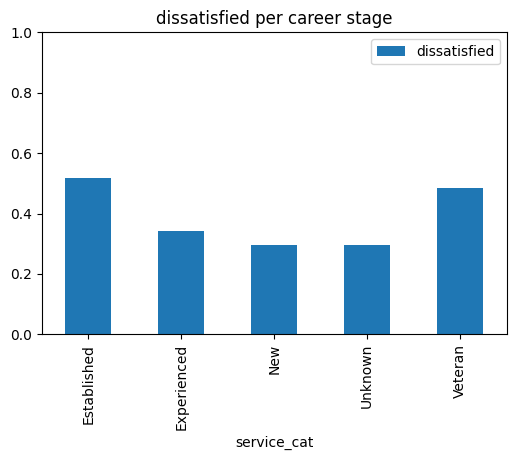

In [49]:
pd.pivot_table(combined_updated, index='service_cat', values='dissatisfied').plot(kind="bar",ylim=(0,1),title="dissatisfied per career stage")

Different to our thoughs new employees is in the last place of the top 5 career stage. so this outcome says to us that:

* Established employees, more of half, with a 51,6 % quit their jobs due to dissatisfaction, remember that established employees are in company from 7 to 10 years.
* Veterans who are in company more than 11 years are in the second place of level of dissatisfaction with 48,5%.
* Experienced employees are in the thirth place with 34,3%
* And finally, 29,5% of the new staff quit their jobs because they were dissatisfied.

because we must answer the second question we will find results with age values instead of service category:

* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [50]:
combined_updated["age"]=combined_updated["age"].astype(str).str.replace("  ","-")
combined_updated["age"].value_counts()

41-45            93
46-50            81
36-40            73
51-55            71
26-30            67
21-25            62
31-35            61
nan              55
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [51]:
pd.pivot_table(combined_updated, index='age', values='dissatisfied')

,dissatisfied
age,
20 or younger,0.200000
21-25,0.306452
26-30,0.417910
31-35,0.377049
36-40,0.342466
41-45,0.376344
46-50,0.382716
51-55,0.422535
56 or older,0.206897


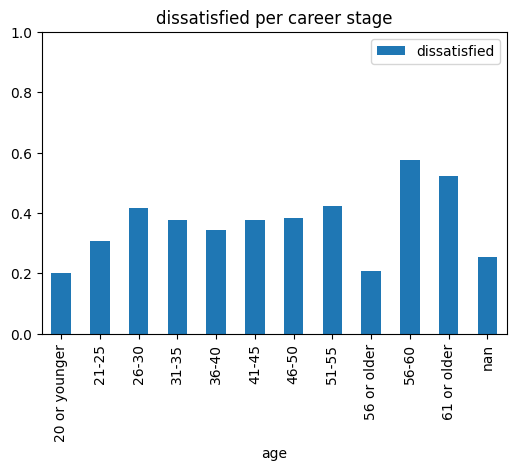

In [52]:
pd.pivot_table(combined_updated, index='age', values='dissatisfied').plot(kind="bar",ylim=(0,1),title="dissatisfied per career stage")

As per previous results we can say that for the next range of age more of half people who quit jobs was because of dissatisfaction:
* 56-60 years: 57,6%
* 61 or +: 52,1%
these ranges are followed by 51-55 years with 42,2%.

About younger people of the rank we have the next outcomes:
* 20 years or -: 20%
* 21-25 years: 30,6%
* 26-30 years: 41,8% 

## FINDINGS

After all process developed previously we are able to answer properly the two questions set:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

For the first question, we can say it is negative,employees who only worked for the institutes for a short period of time not resigning due to some kind of dissatisfaction, unlike the question employees who have been in company longer are the most quit their employs because of dissatisfaction, and newer staff are the less quit jobs because of dissatisfaction.

for the last question the older employees are who quit jobs in greater proportion respect with younger ones because of dissatisfaction. The older people in companies trend to quit their job becuse of dissatisfaction reason unlike people from 26 or less do not quit job because of dissatisfaction. However, people between 26-30 reach 40% of resigned due to they were dissatisfied.

We observe a trend for this two questions, older people who have been for more years in company have quit employe because of dissatisfaction, we assume that older people are who have been in company for more time due to trends of companies is to contract young people or in the middle age, not the older ones.